## What is Regression?

According to the website by [IBM](https://www.ibm.com/topics/linear-regression), Linear regression analysis is used to predict a variable's value based on the other variable's value. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## What is this notebook for?  
In this notebook, I will be sharing some of the evaluation techniques used to measure the accuracy and performance of a Simple Linear Regression model.<br>  
You can find the data set used in this notebook [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv).
<br>  
Source from where I learned these concepts [analyticsvidhya blog](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)

### Exploring Data Set

In [2]:
#reading data from csv file using pandas

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Basic function to know the data type and the number of null values of features (columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

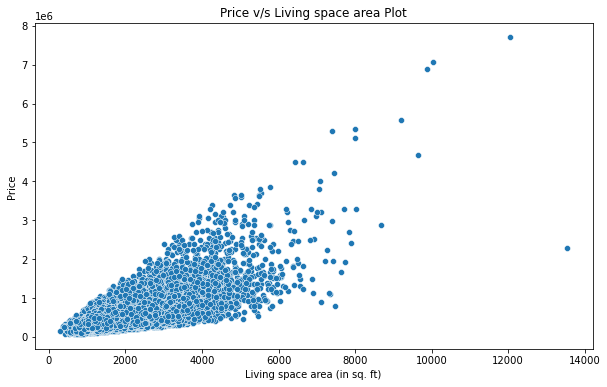

In [4]:
#plotting a scatter plot to see the relationship between the two features

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price');
plt.ylabel("Price")
plt.xlabel("Living space area (in sq. ft)")
plt.title("Price v/s Living space area Plot")
plt.show();

**The above plot shows a positive linear relationship between Price and the living space area.**

## Building a Linear Regression model to predict house price

To build a simple linear regression model, let's take  
Predictor (dependent) variable or Y: **price**  
Independent Variable or X: **sqft_living**

In [5]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression() #Model
lm.fit(X, Y)

LinearRegression()

In [6]:
# A quick method to evaluate the model is to use .score() method

lm.score(X, Y)  # this gives R^2 value

0.4928532179037931

# Model Evaluation Metrics

In [7]:
# predicting values
yHat = lm.predict(X)

### Mean Absolute Error (MAE)

In [8]:
from sklearn.metrics import mean_absolute_error as mae
print(f"Mean Absolute Error = {mae(Y, yHat):.2f}")

Mean Absolute Error = 173688.27


### Mean Squared Error

In [9]:
from sklearn.metrics import mean_squared_error as mse
print(f"Mean Squared Error = {mse(Y, yHat):.2f}")

Mean Squared Error = 68351286833.04


### Root Mean Squared Error

In [10]:
print(f"Root Mean Squared Error = {np.sqrt(mse(Y, yHat)):.2f}")

Root Mean Squared Error = 261440.79


### R squared error (R2)

In [11]:
from sklearn.metrics import r2_score
print(f"R2 score = {r2_score(Y, yHat):.2f}")

R2 score = 0.49


### Adjusted R2 Score

In [12]:
r2 = r2_score(Y, yHat) #storing r2 score in variable r2
p = 1 # as only one independant variable is taken, if k independent variables are present then p = k
n = len(Y)

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R2 score = {adj_r2:.2f}")

Adjusted R2 score = 0.49


## Other ways to evaluate the model

### Plotting a residual plot to visualize the residues

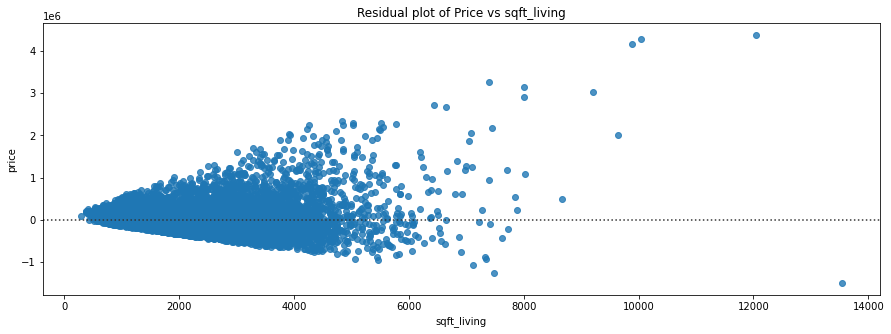

In [13]:
plt.figure(figsize=(15, 5))
sns.residplot(data=df, x='sqft_living', y='price');
plt.title("Residual plot of Price vs sqft_living")
plt.show();

### Cross Validation Score

In [14]:
from sklearn.model_selection import cross_val_score as cvs

lm1 = LinearRegression()
print(f"Cross Validation Score = {cvs(lm1, X, Y, cv=4)}") #folds = 4

Cross Validation Score = [0.48405393 0.49342812 0.4945384  0.49661067]
